# Assignment 2 Distribution Grid Simulation

## Notebook C

### Task 1

- Model and Explore the Grid C given below!

### Task 2

- Load the Dataset C for generation and load and perform a time series simulation.
- Ressources:
    - https://pandapower.readthedocs.io/en/latest/timeseries.html

### Task 3

- Explore how the allocation of the loads and generating elements influence the lines and external grid
- Now focus more on how to reasonably quantify the "goodness" of specific allocations, especially with regard sum of the maximum line loadings per different configuration 


### Task 4
- upload your optimized allocations on moodle, use the format specified in the evaluation notebook!

![fig_grid_C.png](fig_grid_C_with_bus_indices.png)

In [5]:
import pandapower as pp
import pandapower.plotting as plot
import pandas as pd
import numpy as np

In [6]:
net = pp.create_empty_network()

n = 17  # number of buses, loads and generators

buses = [pp.create_bus(net, vn_kv=20, name="Bus 0")]
# append a list of 10 buses to the list buses
buses.extend([pp.create_bus(net, vn_kv=0.4, name=f"Bus {i}") for i in range(1, n + 1)])

buses.extend([pp.create_bus(net, vn_kv=0.4, name=f"Bus {i}") for i in range(n+1, n + 1 + 10)])

nextline = int(np.ceil(n / 2))
lines1 = [
    pp.create_line(
        net,
        from_bus=buses[i],
        to_bus=buses[i + 1],
        length_km=0.021,
        std_type="NAYY 4x50 SE",
        name=f"Line {i}",
    )
    for i in range(1, int(np.floor(n / 2)))
]

pp.create_line(
    net,
    from_bus=buses[1],
    to_bus=buses[nextline],
    length_km=0.021,
    std_type="NAYY 4x50 SE",
    name=f"connection line",
)

lines2 = [
    pp.create_line(
        net,
        from_bus=buses[i],
        to_bus=buses[i + 1],
        length_km=0.021,
        std_type="NAYY 4x50 SE",
        name=f"Line {i}",
    )
    for i in range(int(np.ceil(n / 2)), n)
]

pp.create_line(
    net,
    from_bus=buses[1],
    to_bus=buses[n+1],
    length_km=0.021,
    std_type="NAYY 4x50 SE",
    name=f"connection line",
)

lines3 = [
    pp.create_line(
        net,
        from_bus=buses[i],
        to_bus=buses[i + 1],
        length_km=0.021,
        std_type="NAYY 4x50 SE",
        name=f"Line {i}",
    )
    for i in range(n + 1, n + 10)
]

pp.create_ext_grid(net, buses[0])
tid = pp.create_transformer(
    net, hv_bus=buses[0], lv_bus=buses[1], std_type="0.4 MVA 20/0.4 kV", name="Trafo"
)

# create loads
loads = [
    pp.create_load(net, buses[i], p_mw=0.0010, q_mvar=0.001, name=f"Load {i}")
    for i in range(1, n + 1 + 10)
]
# create generators
generators = [
    pp.create_sgen(net, buses[i], p_mw=0.0010, q_mvar=0.001, vm_pu=1.0, name=f"Gen {i}")
    for i in range(1, n + 1 + 10)
]


No or insufficient geodata available --> Creating artificial coordinates. This may take some time


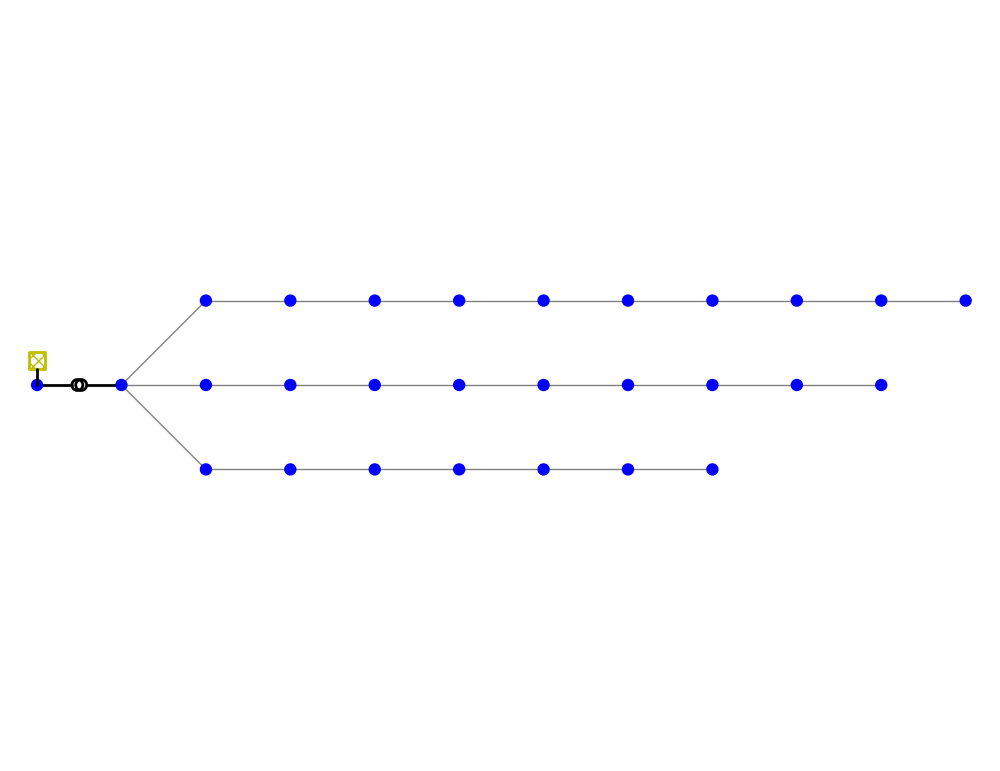

<Axes: >

In [7]:
plot.simple_plot(net)